# Demo 1: Regression models with a synthetic dataset of images

The aim of this notebook is to show how to learn and to test a machine learning (ML) model, in particular a regression model (i.e., supervised learning) with a synthetic dataset of images

Some descriptions of the used dataset (DatasetSynthetic_U64.csv):

* There are 9800 images

* Each image is a data matrix of 28$\times$28, that is, $\mathbf{X} \in \mathbb{R}^{28\times28}$

* Equivalently, each image is a data vector of 764$\times$1, that is, $\mathbf{x} \in \mathbb{R}^{764\times1}$

* Each image (or vector) has a continuous value $y$ associated to it, in specific, $y \in [600 , 4200]$


Note that the idea is to learn or train or tune a ML model, in particular a regression model (i.e., supervised learning) to predict $y$ given a new image $\mathbf{X}$ or a new vector $\mathbf{x}$.

# Andrew, your goal now is to fully understand this notebook, in particular, to understand

* The dataset

* What is the pourpose of the ML regression model

* The code

* The results

* The plots

NOTE: this is not gonna be one-day work, rather, it s gonna be a constand and steady work along time

# Definitions


In [ ]:
# -------------------------------
# Define filename of the dataset
FileName            = "DatasetSynthetic_U64.csv"  # ('DatasetSynthetic_U64.csv', 'DatasetSynthetic_U128.csv', 'DatasetBBH_Type1_D500_K28_Run1')

# -------------------------------
# Select a regression model
model               = "Linear"   # (Linear|Ridge|Lasso|BayesianRidge|DecisionTree|SVR|DNN16|DNN32|DNN64|DNN128|DNN256|DNN512|DNN1024|CNN1|CNN2|CNN3)

# -------------------------------
# Standarization
DoStandarization_X  = False    # (False: no  | True: yes)
DoStandarization_y  = False    # (False: no  | True: yes)

# -------------------------------
# Feature selection
DoFeatureSelection  = False    # (False: no  | True: yes)

# -------------------------------
# For debugging
doprint             = True     # (False: no  | True: yes)
doplot              = True     # (False: no  | True: yes)

# -------------------------------
# Define where you are running the code
RunInColab          = True     # (False: no  | True: yes)

# -------------------------------
# Define K, the shape of the images
Kimg                = 28


# Import libraries

In [ ]:
# -------------------------------
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# -------------------------------
# Import sklearn functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Import sklearn functions for metrics
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error

# -------------------------------
# Import sklearn functions for regression
if model=="Linear" or model=="Ridge" or model=="Lasso" or model=="BayesianRidge":
    from sklearn import linear_model

elif model=="SVR":
    from sklearn.svm import SVR

elif model=="DecisionTree":
    from sklearn import tree

elif model[0:3]=="DNN" and RunInColab:
    from tensorflow import keras
    from tensorflow.keras import layers
    #from tensorflow.keras.optimizers import SGD
    from tensorflow.keras.optimizers import RMSprop

elif model[0:3]=="CNN" and RunInColab:
    import keras
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Activation, Flatten
    from keras.layers import Conv2D, MaxPooling2D

    from keras import backend as K
    #from tensorflow.keras.layers.normalization import BatchNormalization

    from keras import backend as K

    def r2_keras(y_true, y_pred):
        SS_res =  K.sum(K.square( y_true - y_pred ))
        SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
        return ( 1 - SS_res/(SS_tot + K.epsilon()) )

else:
    print("PILAS: esto no puede pasar")


In [ ]:
if RunInColab:
    # -------------------------------
    # If executing in colab:

    # -------------------------------
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # -------------------------------
    # Find location
    !pwd
    !ls
    !ls "/content/drive/MyDrive/uhhh/Project_Regression4MassEstimation"

    # -------------------------------
    # Define ruta del proyecto
    Ruta            = "/content/drive/MyDrive/uhhh/Project_Regression4MassEstimation"

    # -------------------------------
    # Insert the directory
    import sys
    sys.path.insert(0,Ruta)
else:
    # -------------------------------
    # If executing in local computer:

    # -------------------------------
    # Define ruta del proyecto
    Ruta            = ""


Mounted at /content/drive
/content
drive  sample_data
Datasets  Demo1_RegressionModels.ipynb	ResultsDemo1


In [ ]:
# -------------------------------
# Import custom made functions
#import mylibrary as mylibrary


# Load and explore data

In [ ]:
# -------------------------------
# Load dataset as pandas dataframe
df = pd.read_csv(Ruta+"/Datasets/"+FileName)

# -------------------------------
# Print number of row and number of columns in the dataset
print("The data set for gmode slope estimation has {} rows and {} columns".format(df.shape[0],df.shape[1]))


The data set for gmode slope estimation has 9800 rows and 785 columns


In [ ]:
# -------------------------------
# Print dataset
df


,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,600.0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,600.0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,600.0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,600.0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,600.0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,4200.0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
9796,4200.0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
9797,4200.0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
9798,4200.0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [ ]:
# -------------------------------
# Convert data to numpy format
y = df.label.values         # Get predictand or dependent variable
X = df.drop("label",axis=1) # Get predictors or independent variables
X = X.values

# -------------------------------
# Verify X data
minX = np.min(X)
maxX = np.max(X)
print("Verify X data")
print("min max")
print(minX, maxX)
print(" ")

# -------------------------------
# Verify y data
miny = np.min(y)
maxy = np.max(y)
print("Verify y data")
print("min max")
print(miny, maxy)
print(" ")

# -------------------------------
# Print data type
print("Data type X -->",type(X))
print("Data type y -->",type(y))
print(" ")

# -------------------------------
# Print dimensions of X and y
print("Shape X -->",X.shape)
print("Shape y -->",y.shape)


Verify X data
min max
64 255
 
Verify y data
min max
600.0 4200.0
 
Data type X --> <class 'numpy.ndarray'>
Data type y --> <class 'numpy.ndarray'>
 
Shape X --> (9800, 784)
Shape y --> (9800,)


In [ ]:
# -------------------------------
# Unique values of y
print(np.unique(y))

# -------------------------------
# Print number of unique values in y
print("There are {0:d} unique values in y".format(len(np.unique(y))))

# -------------------------------
# Note
print("Despite that there are just a few values of the response \"y\" whithin the range of interest we can still do regression")

[ 600. 1200. 1800. 2400. 3000. 3600. 4200.]
There are 7 unique values in y
Despite that there are just a few values of the response "y" whithin the range of interest we can still do regression


You have selected the image 864
 
Verify Xi data
min max
64 255
 
Verify yi data
min    max
600.0 600.0
 


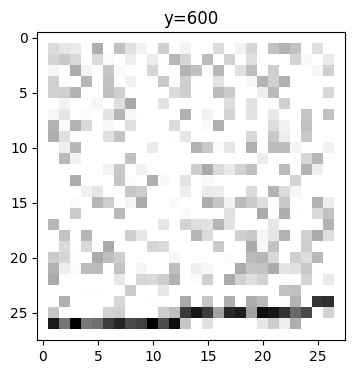

In [ ]:
# -------------------------------
# Plot one of the images in the dataset

# -------------------------------
# Select image
i  = 864
print("You have selected the image {0:d}".format(i) )
print(" ")

# -------------------------------
# Convert from data vector of 764x1 to a data matrix of 28x28
Xi = X[i,:].reshape(Kimg,Kimg) # Data matrix of 28x28
yi = y[i]                  # Scalar output of response for the selected image

# -------------------------------
# Verify Xi data
minX = np.min(Xi)
maxX = np.max(Xi)
print("Verify Xi data")
print("min max")
print(minX, maxX)
print(" ")

# -------------------------------
# Verify yi data
miny = np.min(yi)
maxy = np.max(yi)
print("Verify yi data")
print("min    max")
print(miny, maxy)
print(" ")

# -------------------------------
# Plot selected image
plt.figure(figsize=(4,4))

plt.imshow(Xi, cmap=plt.cm.gray)
plt.title("y={0:.0f}".format(yi))
#plt.xticks([])
#plt.yticks([])
plt.grid(False)

plt.show()


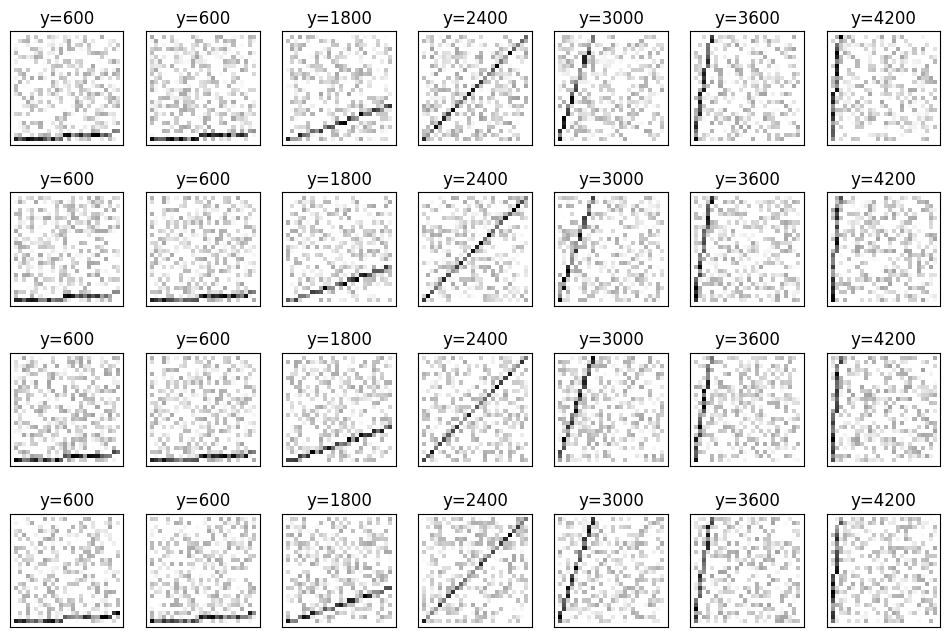

In [ ]:
# -------------------------------
# Now let's select and plot a total of 28 images
#ini = 3000; ListInd = range(0+ini,28+ini,1)
ListInd = [0,1151,2800,4200,5600,7000,8400,
           1,1152,2801,4201,5601,7001,8401,
           2,1152,2802,4202,5602,7002,8402,
           3,1153,2803,4203,5603,7003,8403]

# -------------------------------
# Plot selected images
plt.figure(figsize=(12,8))
for i, i2p in enumerate(ListInd):

    # Get the image and its corresponding y value
    Xi = X[i2p,:]
    yi = y[i2p]

    # Plot the image
    plt.subplot(4,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xi.reshape(Kimg,Kimg), cmap=plt.cm.gray)
    plt.title("y={0:.0f}".format(yi))

plt.show()



# Standarization

In [ ]:
# -------------------------------
# Standarize X
if DoStandarization_X:

    # Create StandardScaler object for "X"
    scaler_X = StandardScaler()
    # Fit the scaler
    scaler_X.fit(X)
    # Scale the data
    X        = scaler_X.transform(X)

# -------------------------------
# Standarize y
if DoStandarization_y:

    # Create StandardScaler object for "y"
    scaler_y = StandardScaler()
    # Fit the scaler
    scaler_y.fit(y.reshape(-1, 1))
    # Scale the data
    y        = scaler_y.transform(y.reshape(-1, 1))
    y        = y.reshape(-1)
    # Print y scaled data information
    print("Mean:",scaler_y.mean_)
    print("STD: ",scaler_y.scale_)

# -------------------------------
# Print information
print("Shape X -->",X.shape)
print("Shape y -->",y.shape)


Shape X --> (9800, 784)
Shape y --> (9800,)


# Feature selection

In [ ]:
# -------------------------------
# Feature selection
if DoFeatureSelection:
    print("Shape X ini -->",X.shape)

    # -------------------------------
    # Removing features with low variance
    from sklearn.feature_selection import VarianceThreshold
    P = 50/100 # Remove features that are either "on" or "off" in more than P% of the samples
    SelectionObject = VarianceThreshold(threshold=(P * (1 - P)))
    X   = SelectionObject.fit_transform(X)
    print("Shape X end -->",X.shape)

    """
    # -------------------------------
    # SelectKBest removes all but the  highest scoring features
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    X = SelectKBest(chi2, k=500).fit_transform(X, y)
    print("Shape X end -->",X.shape)
    """

# -------------------------------
# Print information
print("Shape X -->",X.shape)
print("Shape y -->",y.shape)


Shape X --> (9800, 784)
Shape y --> (9800,)


# Other pre-processing methods

In [ ]:
# -------------------------------
# Other pre-processing methods

# -------------------------------
# Print information
print("Shape X -->",X.shape)
print("Shape y -->",y.shape)


Shape X --> (9800, 784)
Shape y --> (9800,)


# Eliminate corrupted images (or vectors)

In [ ]:
# -------------------------------
# Eliminate corrupted images (or vectors)

# -------------------------------
# Print information
print("Shape X -->",X.shape)
print("Shape y -->",y.shape)


Shape X --> (9800, 784)
Shape y --> (9800,)


# Define funtions

In [ ]:
# -------------------------------
# Scatter plot
def plotresults_scatterplot(yreal, yesti, ymin, ymax, doplot):
    """
    plotresults_scatterplot
    """

    # Verify
    if yreal.size != yesti.size: print("Pilas perrito: esto no puede pasar")

    # Plot
    if doplot:
        plt.figure(figsize=(4, 4))
        plt.scatter(yreal, yesti, s=20, alpha=0.5, label="Model 1")
        x1, y1 = [ymin, ymax], [ymin, ymax]
        plt.plot(x1, y1, "--",color="k")
        plt.xlim(ymin,ymax)
        plt.ylim(ymin,ymax)
        #plt.legend()
        #plt.title("Test")
        plt.xlabel("$y$")
        plt.ylabel("$\hat{y}$")
        plt.show()

    # Return
    return 0

# -------------------------------
# Compute metrics
def computemetrics(yreal, yesti, doprint):
    """
    computemetrics
    """

    # Verify
    if yreal.size != yesti.size: print("Pilas perrito: esto no puede pasar")

    r2      = r2_score(                       yreal, yesti )
    expvar  = 100*explained_variance_score(   yreal, yesti )
    mse     = mean_squared_error(             yreal, yesti )
    mae     = mean_absolute_error(            yreal, yesti )
    mape    = mean_absolute_percentage_error( yreal, yesti )
    maxerr  = max_error(                      yreal, yesti )

    if doprint:
        print("R-squared:                                {0:1.2f}".format(      r2)     )
        print("Explained variance:                       {0:1.0f}%".format(     expvar) )
        print("Mean Squared Error (MSE):                 {0:1.2f} Hz/s".format( mse)    )
        print("Mean Absolute Error (MAE):                {0:1.2f} Hz/s".format( mae)    )
        print("Maximum error (MaxErr):                   {0:1.2f} Hz/s".format( maxerr) )
        print("Mean Absolute Percentage Error (MAPE):    {0:1.2f} %".format(    mape)   )
        print(" ")

    # Return
    return r2, expvar, mse, mae, maxerr, mape


# Fitting a regression model to make predictions of future/unknown inputs

We will evaluate the fitted regression model using hold-out cross-validation (HOCV) procedure


In [ ]:
# -------------------------------
# Split the dataset in train and test dataset: train (70%) and test (30%)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30, random_state=i)

# Check datasets
print("Verify train dataset")
print("Xtrain shape -->",Xtrain.shape)
print("ytrain shape -->",ytrain.shape)
print(" ")

print("Verify test dataset")
print("Xtest shape -->",Xtest.shape)
print("ytest shape -->",ytest.shape)
print(" ")

Verify train dataset
Xtrain shape --> (6860, 784)
ytrain shape --> (6860,)
 
Verify test dataset
Xtest shape --> (2940, 784)
ytest shape --> (2940,)
 


In [ ]:
# -------------------------------
# Create regression object
if model=="Linear":
    M1 = linear_model.LinearRegression()

elif model=="Ridge":
    M1 = linear_model.Ridge(alpha=0.1)

elif model=="Lasso":
    M1 = linear_model.Lasso(alpha=0.01)

elif model=="BayesianRidge":
    M1 = linear_model.BayesianRidge()

elif model=="SVR":
    M1 = SVR(kernel="linear" , C=100, gamma="auto")
    #M1 = SVR(kernel="poly"   , C=100, gamma="auto" , epsilon=0.1, degree=3, coef0=1)
    #M1 = SVR(kernel="rbf"    , C=100, gamma=0.1    , epsilon=0.1)

elif model=="DecisionTree":
    M1 = tree.DecisionTreeRegressor(max_depth=15)

elif model[0:3]=="DNN":
    M1 = keras.Sequential()

    if model=="DNN16":
        M1.add(keras.layers.Dense( 16, activation='relu', input_shape=(784,)))
    elif model=="DNN32":
        M1.add(keras.layers.Dense( 32, activation='relu', input_shape=(784,)))
        M1.add(keras.layers.Dense( 16, activation='relu'))
    elif model=="DNN64":
        M1.add(keras.layers.Dense( 64, activation='relu', input_shape=(784,)))
        M1.add(keras.layers.Dense( 32, activation='relu'))
        M1.add(keras.layers.Dense( 16, activation='relu'))
    elif model=="DNN128":
        M1.add(keras.layers.Dense(128, activation='relu', input_shape=(784,)))
        M1.add(keras.layers.Dense( 64, activation='relu'))
        M1.add(keras.layers.Dense( 32, activation='relu'))
        M1.add(keras.layers.Dense( 16, activation='relu'))
    elif model=="DNN256":
        M1.add(keras.layers.Dense(256, activation='relu', input_shape=(784,)))
        M1.add(keras.layers.Dense(128, activation='relu'))
        M1.add(keras.layers.Dense( 64, activation='relu'))
        M1.add(keras.layers.Dense( 32, activation='relu'))
        M1.add(keras.layers.Dense( 16, activation='relu'))
    elif model=="DNN512":
        M1.add(keras.layers.Dense( 512, activation='relu', input_shape=(784,)))
        M1.add(keras.layers.Dense( 256, activation='relu'))
        M1.add(keras.layers.Dense( 128, activation='relu'))
        M1.add(keras.layers.Dense(  64, activation='relu'))
        M1.add(keras.layers.Dense(  32, activation='relu'))
        M1.add(keras.layers.Dense(  16, activation='relu'))
    if model=="DNN1024":
        M1.add(keras.layers.Dense(1024, activation='relu', input_shape=(784,)))
        M1.add(keras.layers.Dense( 512, activation='relu'))
        M1.add(keras.layers.Dense( 256, activation='relu'))
        M1.add(keras.layers.Dense( 128, activation='relu'))
        M1.add(keras.layers.Dense(  64, activation='relu'))
        M1.add(keras.layers.Dense(  32, activation='relu'))
        M1.add(keras.layers.Dense(  16, activation='relu'))

    M1.add(keras.layers.Dense(  1, activation='linear'))
    M1.compile(optimizer = RMSprop(learning_rate = 0.001), loss = 'mean_squared_error')
    #M1.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
    M1.summary()

elif model[0:3]=="CNN":
    # Define input image dimensions
    img_rows, img_cols = Kimg, Kimg
    input_shape = (img_rows, img_cols, 1)

    # Create CNN model
    M1 = Sequential()

    if   model=="CNN1":
        M1.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
        M1.add(MaxPooling2D(pool_size=(2, 2)))
    elif model=="CNN2":
        M1.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
        M1.add(MaxPooling2D(pool_size=(2, 2)))
        M1.add(Conv2D(32, (3, 3), activation='relu'))
        M1.add(MaxPooling2D(pool_size=(2, 2)))
    elif model=="CNN3":
        M1.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
        M1.add(MaxPooling2D(pool_size=(2, 2)))
        M1.add(Conv2D(32, (3, 3), activation='relu'))
        M1.add(MaxPooling2D(pool_size=(2, 2)))
        M1.add(Conv2D(16, (3, 3), activation='relu'))
        M1.add(MaxPooling2D(pool_size=(2, 2)))

    M1.add(Flatten())
    M1.add(Dense(128, activation='relu'))
    #M1.add(Dropout(0.1))
    #M1.add(Dense(256, activation='relu'))
    #M1.add(Dropout(0.1))
    #M1.add(Dense(128, activation='relu'))
    #M1.add(Dropout(0.1))
    #M1.add(Dense( 64, activation='relu'))
    #M1.add(Dropout(0.1))
    M1.add(Dense(1, activation='linear'))

    # One may use 'mean_absolute_error' as  mean_squared_error
    # You can add several "metrics" if needed
    M1.compile(loss='mean_squared_error', optimizer='adam', metrics=[r2_keras] )

    M1.summary()

In [ ]:
# -------------------------------
# Train model
if model=="Linear" or model=="Ridge" or model=="Lasso" or model=="BayesianRidge" or model=="SVR" or model=="DecisionTree":
    M1.fit( Xtrain, ytrain )

elif model[0:3]=="DNN":
    HIST = M1.fit( Xtrain, ytrain, batch_size=512, epochs=500, verbose=0, validation_data=(Xtest, ytest) )

elif model[0:3]=="CNN":
    Xtrain  = Xtrain.reshape( Xtrain.shape[0], img_rows, img_cols, 1)
    Xtest   = Xtest.reshape( Xtest.shape[0] , img_rows, img_cols, 1)
    HIST    = M1.fit( Xtrain, ytrain, batch_size=512, epochs=150, verbose=0, validation_data=(Xtest, ytest) )

if model[0:3]=="DNN" or model[0:3]=="CNN":
    plt.plot(HIST.history["loss"])
    plt.plot(HIST.history["val_loss"],':')
    plt.title("model lost")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [ ]:
"""

# -------------------------------
# Check how the model behaves with the training data. This is not needed, it is only a verification
if doplot:
    # Make prediction using the training data
    ytrainesti = M1.predict(Xtrain)

    # Denormalize "y" data
    if DoStandarization_y:
        ytrain     = scaler_y.inverse_transform(ytrain.reshape(-1, 1))
        ytrain     = ytrain.reshape(-1)
        ytrainesti = scaler_y.inverse_transform(ytrainesti.reshape(-1, 1))
        ytrainesti = ytrainesti.reshape(-1)

    # Plot results
    plotresults_scatterplot(ytrain, ytrainesti, doplot)

    # Compute and print metrics
    computemetrics(ytrain, ytrainesti, doprint)

    # Check results
    print("Verify results")
    print("YTRUE shape -->",ytrain.shape)
    print("YESTI shape -->",ytrainesti.shape)

"""

'\n\n# -------------------------------\n# Check how the model behaves with the training data. This is not needed, it is only a verification\nif doplot:\n    # Make prediction using the training data\n    ytrainesti = M1.predict(Xtrain)\n\n    # Denormalize "y" data\n    if DoStandarization_y:\n        ytrain     = scaler_y.inverse_transform(ytrain.reshape(-1, 1))\n        ytrain     = ytrain.reshape(-1)\n        ytrainesti = scaler_y.inverse_transform(ytrainesti.reshape(-1, 1))\n        ytrainesti = ytrainesti.reshape(-1)\n    \n    # Plot results\n    plotresults_scatterplot(ytrain, ytrainesti, doplot)\n\n    # Compute and print metrics\n    computemetrics(ytrain, ytrainesti, doprint)\n\n    # Check results\n    print("Verify results")\n    print("YTRUE shape -->",ytrain.shape)\n    print("YESTI shape -->",ytrainesti.shape)\n\n'

In [ ]:
# -------------------------------
# Make predictions using the test data
yesti = M1.predict(Xtest)

if model[0:3]=="DNN" or model[0:3]=="CNN":
    #score = M1.evaluate(Xtest, ytest, verbose=1)
    yesti = yesti.reshape(-1)

# -------------------------------
# Denormalize "y" data
if DoStandarization_y:
    ytest = scaler_y.inverse_transform(ytest.reshape(-1, 1))
    yesti = scaler_y.inverse_transform(yesti.reshape(-1, 1))
    ytest = ytest.reshape(-1)
    yesti = yesti.reshape(-1)

# -------------------------------
# Check results
print("Verify results")
print("YTRUE shape -->",ytest.shape)
print("YESTI shape -->",yesti.shape)


Verify results
YTRUE shape --> (2940,)
YESTI shape --> (2940,)


In [ ]:
# Print and analyse results

# Select one
i = 900

# Print real and estimated value
print("ytest  yesti")
print( ytest[i], yesti[i] )

# Questions:
# How good is the output of the ML regression model?
# What can we do to measure or quantify how good is the ML regression model?


ytest  yesti
4200.0 4260.0


                  Test data


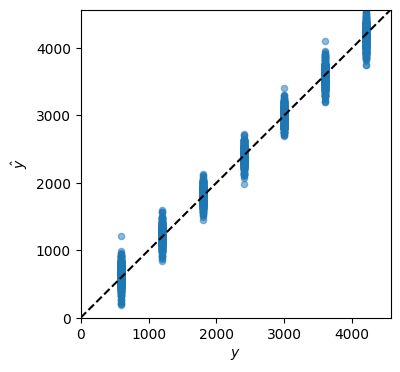

R-squared:                                0.99
Explained variance:                       99%
Mean Squared Error (MSE):                 18301.31 Hz/s
Mean Absolute Error (MAE):                107.83 Hz/s
Maximum error (MaxErr):                   614.00 Hz/s
Mean Absolute Percentage Error (MAPE):    0.07 %
 


In [ ]:
# -------------------------------
# Plot results
print("                  Test data")
y_minval = 0
y_maxval = int(yesti.max())
plotresults_scatterplot(ytest, yesti, y_minval, y_maxval, doplot)

# -------------------------------
# Compute and print metrics
r2, expvar, mse, mae, maxerr, mape = computemetrics(ytest, yesti, doprint)

# Save results

In [ ]:
# -------------------------------
# Convert YTRUE and YESTI to pandas
dfy   = np.array([ytest,yesti]).T
dfy   = pd.DataFrame(dfy, columns=['ytrue','yesti'])

# -------------------------------
# Save data
dfy.to_csv(Ruta + "ResultsDemo1" + "/" + FileName[0:-4] + "_" + model + "_YtrueYesti" + ".csv", index=False)

# -------------------------------
# print dataframe
dfy


OSError: ignored